<a href="https://colab.research.google.com/github/anjali-ojha/deep-learning/blob/main/assignment/assignment-2/Anjali_Ojha_HW_2_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homwwork-2 - Tensorflow

## Use the code provided in demo 02 to complete this assignment.

## Step 1. Follow along with the tutorial to gain an understanding of the process.

In [1]:
%matplotlib inline

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import tensorflow as tf
import numpy as np
import pandas as pd
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

## Step 2. In a new .ipynb notebook, reproduce the results utilizing the "QMNIST" dataset

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

# Load and preprocess QMNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
train_labels_onehot = tf.one_hot(train_labels, depth=10).numpy().astype(np.float32)
test_labels_onehot = tf.one_hot(test_labels, depth=10).numpy().astype(np.float32)

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
def show_data(data, labels):
    """
    This method shows some sample data with labels
    """
    labels_map = {
        0: "Zero",
        1: "One",
        2: "Two",
        3: "Three",
        4: "Four",
        5: "Five",
        6: "Six",
        7: "Seven",
        8: "Eight",
        9: "Nine",
    }
    figure = plt.figure(figsize=(8, 8))
    cols, rows = 3, 3
    for i in range(1, cols * rows + 1):
        sample_idx = torch.randint(len(data), size=(1,)).item()
        img, label = data[sample_idx], labels[sample_idx]
        figure.add_subplot(rows, cols, i)
        plt.title(labels_map[label])
        plt.axis("off")
        plt.imshow(img.squeeze(), cmap="gray")
    plt.show()

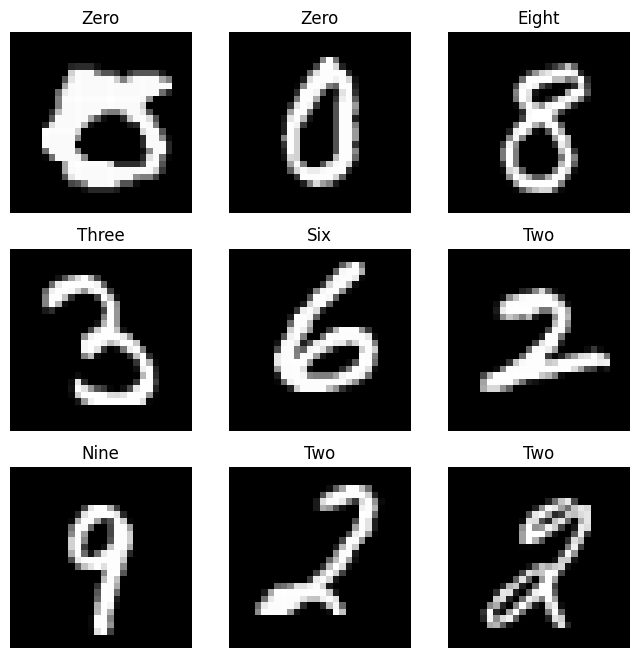

In [5]:
show_data(train_images, train_labels)

In [6]:
def train_tensorflow(X_train, y_train, model, loss, optimizer, metrics, epochs, verbose=0):
    """
    This method will train the tensorflow Neural Network Model
    It takes the parameters like -
        X_train = training data
        y_train = training labels
        model = base model to train
        loss = loss function
        optmizer =  'adam' or 'SGD'
        metrics = which used to evaluate the model
        epocs  = number of iteration the moedls will be trained
        verbose = to control logs
    """
    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
    history = model.fit(X_train, y_train, epochs=epochs, verbose=verbose)

    losses = history.history['loss']
    accuracies = history.history['accuracy']

    return model, losses[-1]

In [7]:
def evaluation(model, test_images, test_labels):
    """
    Evaluate the model with test data
    """
    predictions = model.predict(test_images)
    predicted_labels = np.argmax(predictions, axis=1)
    correct_predictions = np.sum(predicted_labels == test_labels)
    total_predictions = len(test_labels)
    accuracy = correct_predictions / total_predictions
    print(f'Accuracy on test set: {accuracy * 100 :.5}%')
    return accuracy

In [15]:
def show_sample_result(model, images, labels):
    image, label = images[1], labels[1]
    # image = image.view(28, 28)
    # image_numpy = image.numpy()

    plt.axis("off")
    plt.imshow(image.squeeze(), cmap="gray")

    predictions = model.predict(test_images)
    predicted_labels = np.argmax(predictions, axis=1)
    # Show the image
    plt.title(f'Predicted Label: {predicted_labels[1]}, Actual Label: {label}')
    plt.axis('off')
    plt.show()

## Step 3. Report on the results in terms of prediction accuracy on the train and test datasets

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0112 - accuracy: 0.9279
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0056 - accuracy: 0.9635
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0042 - accuracy: 0.9730
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0035 - accuracy: 0.9780
Epoch 5/5
313/313 [==============================] - 1s 2ms/step
Accuracy on test set: 97.18%
313/313 [==============================] - 1s 2ms/step


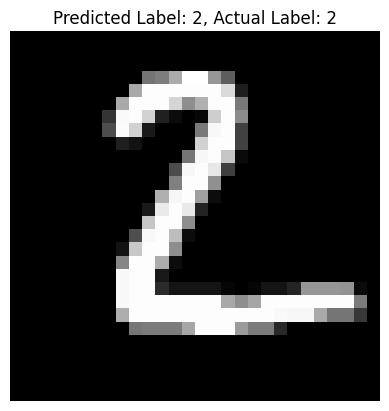

In [16]:
"""
Base Model Architecture
"""
model = models.Sequential([
            layers.Flatten(input_shape=(28, 28)),
            layers.Dense(128, activation='relu'),
            layers.Dense(64, activation='relu'),
            layers.Dense(10, activation='softmax')
        ])


model, _ = train_tensorflow(train_images,
                            train_labels_onehot,
                            model,
                            loss = 'mse',
                            optimizer = 'adam',
                            metrics = ['accuracy'],
                            epochs=5,
                            verbose=1)

test_accuracy = evaluation(model, test_images, test_labels)
show_sample_result(model, test_images, test_labels)

## Step 4. Choose one of the proposed modifications below:

### 1 - Add another Dense layer of 128 nodes

In [ ]:
"""
Added a extra layer in the model
"""
model_extra_layer = models.Sequential([
            layers.Flatten(input_shape=(28, 28)),
            layers.Dense(128, activation='relu'),
            layers.Dense(128, activation='relu'),
            layers.Dense(64, activation='relu'),
            layers.Dense(10, activation='softmax')
        ])


model_extra_layer, _ = train_tensorflow(train_images,
                            train_labels_onehot,
                            model_extra_layer,
                            loss = 'mse',
                            optimizer = 'adam',
                            metrics = ['accuracy'],
                            epochs=5,
                            verbose=1)

test_accuracy_extra_layer = evaluation(model_extra_layer, test_images, test_labels)

Epoch 1/5
1875/1875 [==============================] - 2s 957us/step - loss: 0.0115 - accuracy: 0.9236
Epoch 2/5
1875/1875 [==============================] - 2s 956us/step - loss: 0.0057 - accuracy: 0.9628
Epoch 3/5
1875/1875 [==============================] - 2s 960us/step - loss: 0.0044 - accuracy: 0.9724
Epoch 4/5
1875/1875 [==============================] - 2s 974us/step - loss: 0.0038 - accuracy: 0.9764
Epoch 5/5
313/313 [==============================] - 0s 442us/step
Accuracy on test set: 97.11%


### Increase the current number of nodes in the layer to 256

In [ ]:
"""
Make a exisitng layer wide
"""
model_wide_layer = models.Sequential([
            layers.Flatten(input_shape=(28, 28)),
            layers.Dense(256, activation='relu'),
            layers.Dense(64, activation='relu'),
            layers.Dense(10, activation='softmax')
        ])


model_wide_layer, _ = train_tensorflow(train_images,
                                        train_labels_onehot,
                                        model_wide_layer,
                                        loss = 'mse',
                                        optimizer = 'adam',
                                        metrics = ['accuracy'],
                                        epochs=5,
                                        verbose=1)

test_accuracy_wide_layer = evaluation(model_wide_layer, test_images, test_labels)

Epoch 1/5
1875/1875 [==============================] - 2s 968us/step - loss: 0.0107 - accuracy: 0.9300
Epoch 2/5
1875/1875 [==============================] - 2s 975us/step - loss: 0.0051 - accuracy: 0.9674
Epoch 3/5
1875/1875 [==============================] - 2s 953us/step - loss: 0.0039 - accuracy: 0.9754
Epoch 4/5
1875/1875 [==============================] - 2s 972us/step - loss: 0.0031 - accuracy: 0.9803
Epoch 5/5
313/313 [==============================] - 0s 487us/step
Accuracy on test set: 97.45%


## Step 6. Report on the results of the modified model and if it matches your hypothesis

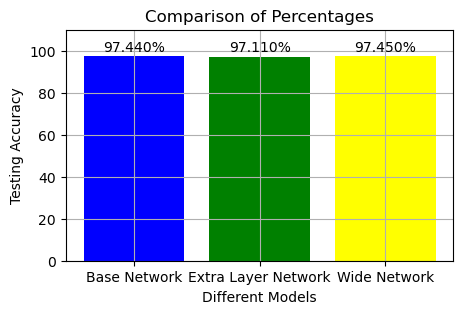

In [ ]:
"""
Performance Comparisions for the differnet models
"""
labels = ['Base Network', 'Extra Layer Network', 'Wide Network']
values = [test_accuracy*100, test_accuracy_extra_layer*100, test_accuracy_wide_layer*100]

plt.figure(figsize=(5, 3))
bars = plt.bar(labels, values, color=['blue', 'green', 'yellow'])

for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{value:.3f}%', ha='center', va='bottom')

plt.ylim(0, 110)
plt.title('Comparison of Percentages')
plt.xlabel('Different Models')
plt.ylabel('Testing Accuracy')
plt.grid(True)

# Show the plot
plt.show()

## Step 7. Experiment with different optimizers, loss functions, dropout, and activation functions, and observe the change in performance as you tune these hyperparameters.

In [ ]:
"""
Defining a model class which have a variable dropout and activation functions.
So that we can measure the performance for each of the model
"""
def MLP_Flex(activation_function, dropout):
    return models.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(128, activation=activation_function),
        layers.Dropout(dropout),
        layers.Dense(64, activation=activation_function),
        layers.Dropout(dropout),
        layers.Dense(10, activation=activation_function)
    ])

In [ ]:
optimizers = ['adam', 'sgd', 'rmsprop']
loss_functions = ['mse', 'categorical_crossentropy']
dropouts = [0.0, 0.2, 0.5]
activation_functions = ['relu', 'sigmoid']

result = {"optimizer":[], "loss": [], "dropout":[], "activation": [],
          "training_loss": [], "test_accuracy": [], "name": []}

for optimizer in optimizers:
    for loss_function in loss_functions:
        for dropout in dropouts:
            for activation_function in activation_functions:

                result["optimizer"].append(optimizer)
                result["loss"].append(loss_function)
                result["activation"].append(activation_function)
                result["dropout"].append(dropout)

                name = []
                for key in ["optimizer", "loss", "activation", "dropout"]:
                    name.append(f'{key}={result[key][-1]}')

                result["name"].append(",".join(name))

                print(f'''\n\tTraining {result["name"][-1]}''')

                model = MLP_Flex(activation_function=activation_function, dropout=dropout)

                model, training_loss = train_tensorflow(train_images,
                                                        train_labels_onehot,
                                                        model_wide_layer,
                                                        loss = loss_function,
                                                        optimizer = optimizer,
                                                        metrics = ['accuracy'],
                                                        epochs=5,
                                                        verbose=0)

                test_accuracy = evaluation(model, test_images, test_labels)

                result["training_loss"].append(training_loss)
                result["test_accuracy"].append(test_accuracy*100)



	Training optimizer=adam,loss=mse,activation=relu,dropout=0.0
313/313 [==============================] - 0s 532us/step
Accuracy on test set: 98.06%

	Training optimizer=adam,loss=mse,activation=sigmoid,dropout=0.0
313/313 [==============================] - 0s 542us/step
Accuracy on test set: 97.83%

	Training optimizer=adam,loss=mse,activation=relu,dropout=0.2
313/313 [==============================] - 0s 490us/step
Accuracy on test set: 97.84%

	Training optimizer=adam,loss=mse,activation=sigmoid,dropout=0.2
313/313 [==============================] - 0s 478us/step
Accuracy on test set: 98.11%

	Training optimizer=adam,loss=mse,activation=relu,dropout=0.5
313/313 [==============================] - 0s 518us/step
Accuracy on test set: 97.99%

	Training optimizer=adam,loss=mse,activation=sigmoid,dropout=0.5
313/313 [==============================] - 0s 492us/step
Accuracy on test set: 97.89999999999999%

	Training optimizer=adam,loss=categorical_crossentropy,activation=relu,dropout=0.0
3

In [ ]:
result_df = pd.DataFrame(result)
result_df

,optimizer,loss,dropout,activation,training_loss,test_accuracy,name
0,adam,mse,0.0,relu,1.544870e-03,98.06,"optimizer=adam,loss=mse,activation=relu,dropou..."
1,adam,mse,0.0,sigmoid,1.325647e-03,97.83,"optimizer=adam,loss=mse,activation=sigmoid,dro..."
2,adam,mse,0.2,relu,1.159115e-03,97.84,"optimizer=adam,loss=mse,activation=relu,dropou..."
3,adam,mse,0.2,sigmoid,9.930653e-04,98.11,"optimizer=adam,loss=mse,activation=sigmoid,dro..."
4,adam,mse,0.5,relu,1.027381e-03,97.99,"optimizer=adam,loss=mse,activation=relu,dropou..."
5,adam,mse,0.5,sigmoid,9.283521e-04,97.90,"optimizer=adam,loss=mse,activation=sigmoid,dro..."
6,adam,categorical_crossentropy,0.0,relu,8.966312e-03,98.14,"optimizer=adam,loss=categorical_crossentropy,a..."
7,adam,categorical_crossentropy,0.0,sigmoid,4.817904e-03,98.16,"optimizer=adam,loss=categorical_crossentropy,a..."
8,adam,categorical_crossentropy,0.2,relu,5.635512e-03,98.12,"optimizer=adam,loss=categorical_crossentropy,a..."
9,adam,categorical_crossentropy,0.2,sigmoid,5.251824e-03,97.90,"optimizer=adam,loss=categorical_crossentropy,a..."


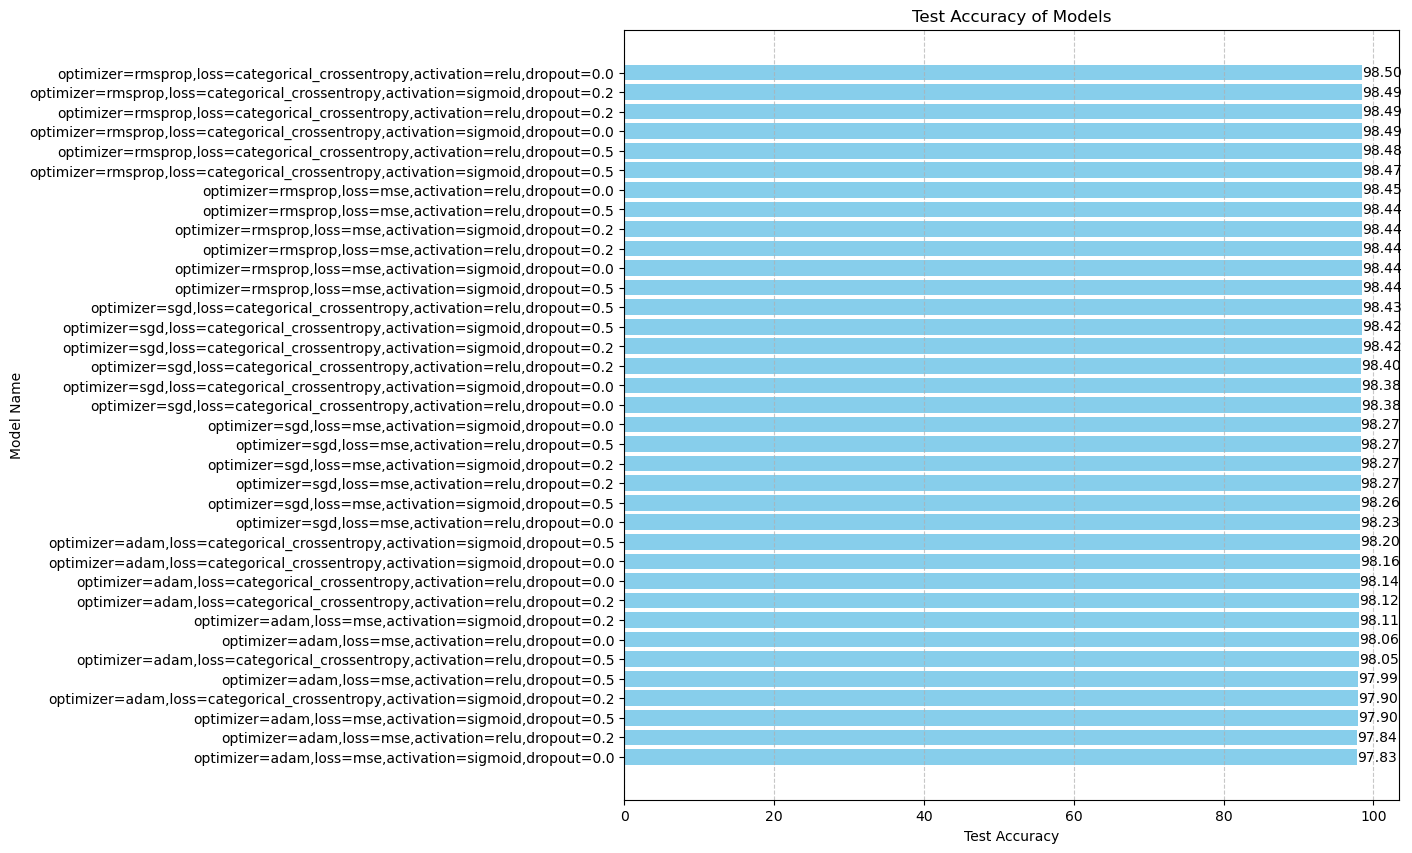

In [ ]:
"""
Sort DataFrame by Test_Accuracy in increasing order and plot it for different models
"""

df_sorted = result_df.sort_values(by='test_accuracy')

plt.figure(figsize=(10, 10))
bars = plt.barh(df_sorted['name'], df_sorted['test_accuracy'], color='skyblue')

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}',
             va='center', ha='left', fontsize=10)
plt.xlabel('Test Accuracy')
plt.ylabel('Model Name')
plt.title('Test Accuracy of Models')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

## The overall all the hyper parameter combinations are performing well and all the models have similar performance.